### <center>📜 **<font color="blue">Question 2:</font> In which months is the primary time to post rooms for rent? Why is that? (Based on back-to-school month, summer month)** </center>

#### 📙**Import the necessary libraries**

In [96]:
import numpy as np
import pandas as pd

### ✨ **1. Get newest data**

In [97]:
rented_house_df = pd.read_csv('../data/HCMHouseRentPreprocessing.csv')
rented_house_df.head()

,id,title,price,published,acreage,street,ward,district
0,0,"Cho thuê nhà trọ mới sạch đẹp tại Lê Đình Cẩn,...",2200000,2022-05-16,20.0,Lê Đình Cẩn,Phường Tân Tạo,Quận Bình Tân
1,1,Cho thuê phòng trọ giá rẻ ở mặt tiền hẻm lớn Đ...,2500000,2022-04-20,20.0,487/35/25 Đường Huỳnh Tấn Phát,Phường Tân Thuận Đông,Quận 7
2,2,Cho thuê phòng trọ kdc Nam Long-Trần Trọng Cun...,3500000,2022-05-10,30.0,Đường 10,Phường Tân Thuận Đông,Quận 7
3,3,Phòng trọ giá rẻ ngay cổng khu chế xuất Tân Th...,1500000,2022-05-05,30.0,283/15 Huỳnh Tấn Phát,Phường Tân Thuận Đông,Quận 7
4,4,"Cho thuê phòng có gác, không gác, tolet riêng ...",3500000,2022-01-05,18.0,Lê Văn Sỹ,Phường 14,Quận Phú Nhuận


### 💎 **2. Group by month the number of rented houses posted over the years.**

In [98]:
# create month and year columns 
rented_house_df['month'] = pd.DatetimeIndex(rented_house_df['published']).month
rented_house_df['year'] = pd.DatetimeIndex(rented_house_df['published']).year

# create month_year column and convert to format YYYY-MM
rented_house_df['month_year'] = pd.to_datetime(rented_house_df[['year', 'month']].assign(DAY=1))
rented_house_df['month_year'] = pd.to_datetime(rented_house_df['month_year']).dt.strftime('%Y-%m')

# group by month and count number of houses
rented_house_df['month_year'].groupby(rented_house_df['month']).count()

# calculate number of houses in month for each year
month_each_year = rented_house_df['month_year'].groupby([rented_house_df['month'], rented_house_df['year']]).count()
month_each_year.head(12)


month  year
1      2016      4
       2017      7
       2018     25
       2019     27
       2020     35
       2021    118
       2022    194
2      2016      9
       2017     12
       2018     17
       2019     29
       2020     90
Name: month_year, dtype: int64

### ⌨ **3. Create dataframe with month, total number of houses and average number of houses.**

In [99]:
# sum of number of houses in month for each year
sum_each_month = month_each_year.groupby(month_each_year.index.get_level_values(0)).sum().reindex(range(1,13)).reindex(range(1,13), fill_value=0)
# create a dataframe with month and sum_each_month column
sum_each_month_df = pd.DataFrame({'month': sum_each_month.index, 'sum_each_month': sum_each_month.values})
sum_each_month_df
sum_each_month_df['average'] = sum_each_month_df['sum_each_month'] / (rented_house_df['year'].unique().size)
sum_each_month_df

,month,sum_each_month,average
0,1,410,51.250
1,2,551,68.875
2,3,740,92.500
3,4,867,108.375
4,5,1194,149.250
5,6,1102,137.750
6,7,1338,167.250
7,8,557,69.625
8,9,274,34.250
9,10,556,69.500


### 📝 **4. Visualize the average number of houses posted in each month.**

<AxesSubplot:title={'center':'Average number of houses rented in each month'}, xlabel='month'>

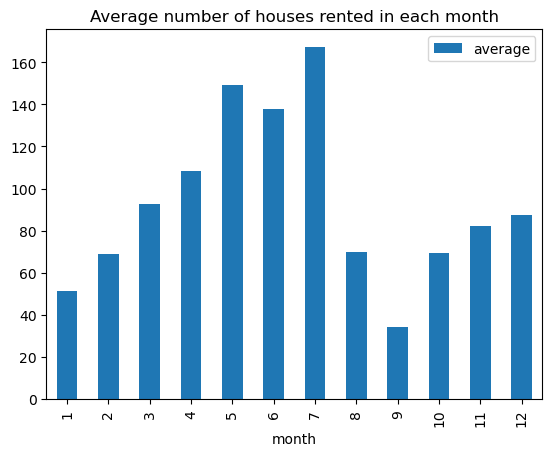

In [100]:
# plot average number of houses rented in each month 
sum_each_month_df.plot(x='month', y='average', kind='bar', title='Average number of houses rented in each month')

&#9889; <font color="yellow"><b>What are benefits of finding the answer? </b></font>
>- Monthly statistics of the year help homeowners have plans to serve the times when the demand for rent is high in the city.
>- According to the chart, the number of rooms posted in the months of May, June, and July is quite high (average over 140 rooms). This is also easy to explain because it is the time when students enroll and need to find accommodation.
>- Therefore, the following months (August, September, and October) the number of rooms for rent is quite low, nearly halving compared to the previous months (about 35 to 70 rooms) because this is the time when students enter school. accommodation has been settled.
>- The remaining months average between 70 and 110 rooms per month.
> => Thus, from the above data, we can tell landlords when the demand for rental housing increases so that there are prepared mechanisms to respond.
    